# Lecture 16: Data Association

```{note}
In this lecture, we are going to explore how associations between variables can be measured and interpreted. We will introduce correlation as a statistical measure of linear association, discuss its mathematical formulation, examine its limitations, and distinguish between association and causation. Examples using demographic and expenditure data will help demonstrate how correlation can provide insights into behavioral patterns, but also why it must be used with caution. This foundation will prepare us to critically evaluate associations in empirical datasets.
```

---

## Definition of Association

Two variables $X$ and $Y$ are said to be associated if, for instance, the $\displaystyle \lim_{h \to 0} \sigma_{Y|X \in (x-h,x+h)} < \sigma_Y$, or similarly if, $\displaystyle \lim_{h \to 0} \sigma_{X|Y \in (y-h,y+h)} < \sigma_X$, i.e., the local conditional standard deviation of one variable, for a specific value of the other variable, is smaller than the global (unconditional) standard deviation. Intuitively, this means that knowing the value of one variable allows us to predict the other variable with reduced certainty, thereby implying association between two variables.

### Example

To further understand association between two variables, let's look at some example scatter plots from the Indian Time Use Survey

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

In [ ]:
# 2024 ITUS Individual Data (processed)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_IND_DT.csv"
data <- read.csv(url) # Loading Data

#### Log Monthly Expenditure vs. Household Size

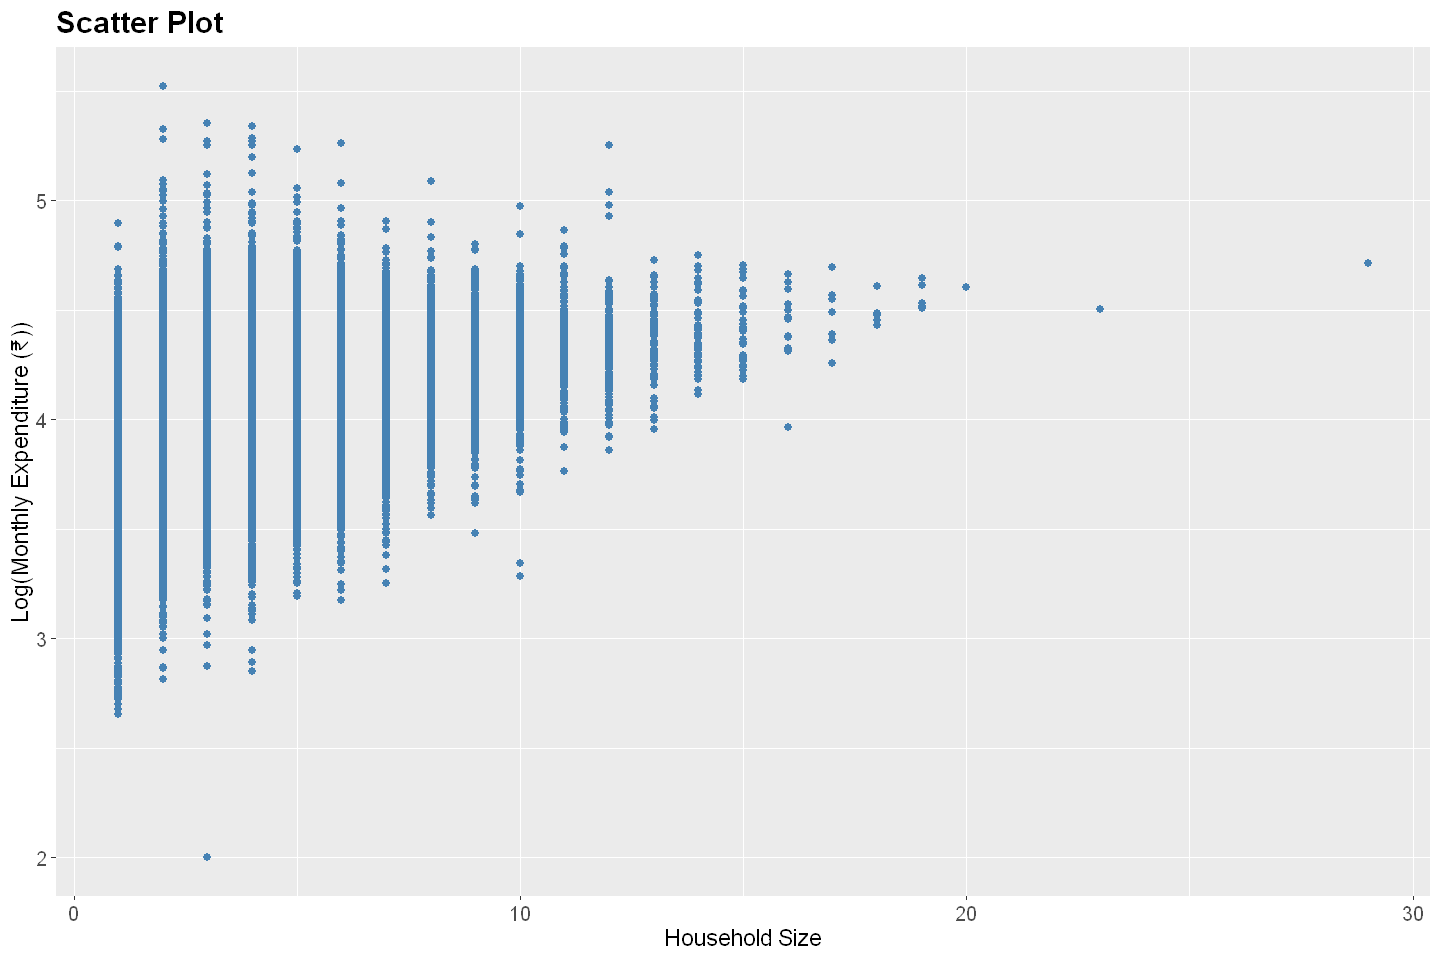

In [4]:
# Create a scatter plot
ggplot(data, aes(x = household_size, y = log10(total_expenditure))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Log(Monthly Expenditure (₹))"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

#### Log Monthly Expenditure vs. Age

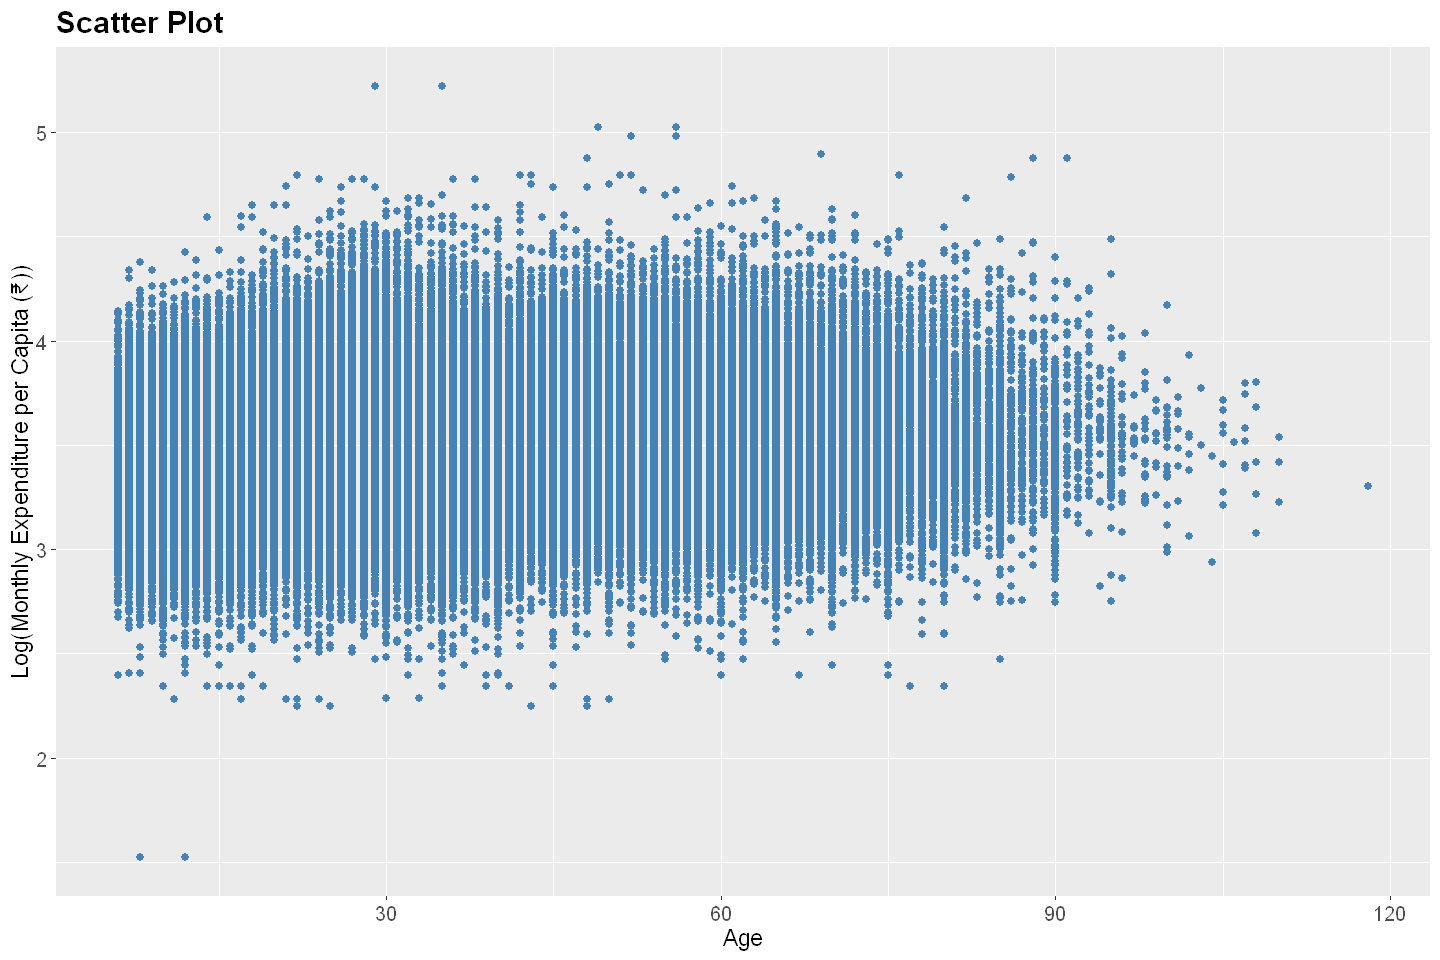

In [12]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

# 2024 ITUS sample individual data
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS-IND-PD.csv"
data <- read.csv(url) # Loading Data

# Create a scatter plot
ggplot(data, aes(x = age, y = log10(total_expenditure / household_size))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Age",
    y = "Log(Monthly Expenditure per Capita (₹))"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

## Measures of Association

From the above two examples, one can conclude that household size has a stronger association with monthly household expenditure, while age has a weaker association with monthly expenditure per capita. We can convey these qualitative assessments quantitatively using measures of association. The most common such measure is the correlation coefficient, which captures the strength and direction of a linear relationship between two variables.

Mathematically speaking, for any two variables $X$ and $Y$, the correlation between them is given by,

$$ r = \text{Cov}(X,Y) / \sigma_X\sigma_Y $$

where, $\text{Cov}(X,Y)$ is the covariance in $X$ and $Y$, given as $\text{E}[(X - \mu_X)(Y - \mu_Y)] = 1/n \sum_i(x_i - \mu_X)(y_i - \mu_Y)$.

Note, the correlation $r$ ranges between -1 and 1, with the former signifying a perfect negative linear relation, while the latter denoting a perfect postive linear relation. Here, it is important to note that correlation measures linear association only, i.e., a correlation of zero means no linear association, not necessarily no association at all. For instance, $X \sim \text{U}(-1,1)$ and $Y = X^2$ are obviously associated, but have zero correlation value.

### Example

To evaluate association between two variables, let's look back at the examples from the Indian Time Use Survey

#### Log Monthly Expenditure vs. Household Size

In [3]:
cor(data$household_size, log10(data$total_expenditure), use = "complete.obs")

[1] 0.3833697

#### Log Monthly Expenditure vs. Age

In [ ]:
cor(data$age, log10(data$total_expenditure / data$household_size), use = "complete.obs")

[1] 0.1349597

## Fallacies of Association

Association between variables is frequently mistaken as evidence of a causal relationship—an error that can lead to misguided conclusions and policy decisions. For instance,

- Ice cream sales and shark-attack incidents are positively associated. However, this is not because ice cream consumption causes shark-attacks, but because both are influenced by a third factor—temperature. In summer, people are more likely to buy ice cream and also to swim on the beach, which increases the risk of shark-attacks.

- Students who bring lunch from home may perform better academically than those who eat school-provided meals. But this association may be confounded by socioeconomic status, as students from higher-income families are more likely to bring lunch and have access to other educational resources.

- Increased screen time might be associated with lower mental well-being in adolescents. While this might suggest a causal link, it is possible that underlying psychological distress leads individuals to spend more time online, or that both are influenced by a third factor such as lack of social support.

These examples underscore the critical point: Association does not imply causation. Just because two variables move together does not mean one is causing the other to change.

There is a fallacy of logic known since ancient times: post hoc ergo propter hoc—"after this, therefore because of this." This fallacy is rooted in the human tendency to perceive patterns and infer cause-effect relationships even where none exist. It is common to assume that if two things are correlated, then one must cause the other. That assumption, however intuitive, is logically flawed and scientifically unsound without further empirical validation.

Understanding this distinction is essential, particularly in disciplines such as economics, epidemiology, and social sciences, where confounding variables, reverse causality, and omitted variable bias can all obscure the true nature of the relationships under investigation. Robust methods such as randomized controlled trials, natural experiments, and statistical controls (e.g., regression with covariates) are necessary to move from observed association to credible causal inference.